In [1]:
from levelwise_model.levelwise_model import LevelwiseModel
from levelwise_model.config import Config, Word2VecConfig, SentencePieceConfig
from levelwise_model.test_bench import LSTestBench

In [2]:
tag = "original_60k_250x1"

In [3]:
lw_model = LevelwiseModel(
    tag=tag,
)

In [5]:
configs = [
    Config(
        SentencePieceConfig(max_sentence_length=60000, vocab_size=60000, model_type="unigram"),
        Word2VecConfig(vector_size=250, window=1),
        cluster_threshold=0.95
    )
]

In [6]:
test_bench = LSTestBench(scores_file="data/level_wise/level0/pairs.txt")

In [7]:
lw_model.train(
    input_file="data/level_wise/level0/corpus_original.txt",
    utterance_file="data/level_wise/level0/utterances_original.txt",
    configs=configs,
    test_bench=test_bench
)

## Playground

### Get number of tokens per utterance

In [8]:
from levelwise_model.utterances import WordToUtteranceMapping
import sentencepiece as spm
import matplotlib.pyplot as plt

In [9]:
utterance_mapping = WordToUtteranceMapping(map_file="data/original_60k_250x1/level1/utterances.txt")
sp_model = spm.SentencePieceProcessor()
sp_model.Load("models/original_60k_250x1/level1/unigram_vs60000_lw.model")
each_word_maps, all_lengths = utterance_mapping.get_utterance_stats(sp_model)

In [10]:
sum(all_lengths) / len(all_lengths)

1.7932391082616932

(array([4.366e+03, 4.040e+02, 1.605e+03, 2.070e+02, 2.240e+02, 3.400e+01,
        2.000e+01, 1.000e+00, 2.000e+00, 0.000e+00]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.]),
 <BarContainer object of 10 artists>)

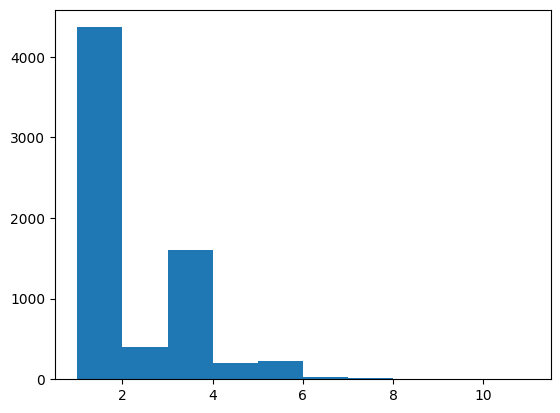

In [11]:
plt.hist(all_lengths, bins=range(1, 12))

### Get number of clusters

In [12]:
from levelwise_model.cluster import Cluster

In [13]:
clusters = Cluster(map_file="data/original_60k_250x1/level1/clusters.txt")
len(clusters.cluster_to_words)

56497